# Exercice of the 2nd class: US Marriage and Divorces

Your job is to open the file name "data/us_marriages_divorces.cvs" and to extract statistics out of it.


1. Extract the data and create the following variables (numpy array!): Year, Marriages, Divorces, Population, Marriages per 1000, Divorces per 1000.
2. Show the evolution of Marriages and Divorces as a function of time.
3. When was the maximum of marriages per 1000-persons (see the argmax option of numpy)? of Divorces?
4. Show the histogram of Marriages per 1000-persons. What is the median, mean, std and nmad of the distribution.
5. What was the average us-population during the 30s, and during the 2000s ?
6. Reproduce the following plot: (see the website/lecture slide for the colored version)


***
## This is the correction notebook
***

You should always start with that to have matplotlib display the plot within the notebook. The warning-associated commands can be removed, this is to avoid having some annoying development warnings.

In [1]:
# ==  Basic import == #
# plot within the notebook
%matplotlib inline
# No annoying warnings
import warnings
warnings.filterwarnings('ignore')

## The basic import

* numpy (as np) ; for the array manipulation
* matplotlib.pyplot (as mpl) ; for the plot methods

In [2]:
import numpy as np
import matplotlib.pyplot as mpl

# 1: Open the data and create the associated variables

#### Opening and reading the file

`open` will access the file from python and the `read` method will convert the file into a long string. 
The `splitlines` methods enable to have an array a string, each entry of the array being the line. That is, each line of the file will the here a unique long string.

In [3]:
data = open("data/us_marriages_divorces.csv").read().splitlines()

Has a check, here is the first line, the header of the file containing the name of each column. The entries (as well as the values later on) are separated with a comma (so the "csv" name "comma separated values).

In [4]:
data[0]

'Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000'

To split this long strong into a list of array containing the entries of the header, use the `split` method of strings.
Here you want to split at the comma so:

In [5]:
entries = data[0].split(",")

In [6]:
print(entries) # could do "print entries" in python 2.7 but not in 3.5

['Year', 'Marriages', 'Divorces', 'Population', 'Marriages_per_1000', 'Divorces_per_1000']


#### Creating the arrays associated with the values

Let's create a empty list for each of the entries and let's fill them by looping line by line in the file

In [7]:
Year,Marriages,Divorces,Population, Marriages_per_1000, Divorces_per_1000 = [],[],[],[],[],[]

when doing the following for loop, `d` will be a line for `data`, i.e. a long string that we should split at the comma to have access to the independent variables. 

In [8]:
for d in data[1:]:
    Year_,Marriages_,Divorces_,Population_, Marriages_per_1000_, Divorces_per_1000_ = d.split(",")
    Year.append(Year_)
    Marriages.append(Marriages_)
    Divorces.append(Divorces_)
    Population.append(Population_)
    Marriages_per_1000.append(Marriages_per_1000_)
    Divorces_per_1000.append(Divorces_per_1000_)
    

Convert them in numpy array !!

In [9]:
Year              = np.asarray(Year)
Marriages         = np.asarray(Marriages)
Divorces          = np.asarray(Divorces)
Population        = np.asarray(Population)
Marriages_per_1000= np.asarray(Marriages_per_1000)
Divorces_per_1000 = np.asarray(Divorces_per_1000)
    

***
### Tips for you: The comprehension list. 

There is a faster (to write and to run) way to do for loop in python: the comprehension list.
The will be structured as follow:
```python
   A=[ do_something_with_d for d in data ]
```
Then `A` will be the list of the things you made for each d entry. 

You can also add condition about `d`, like for intance if `data` is a list of names and we only want to loop over the names within a second list of names called `only_these_names`

```python
   A=[ do_something_with_d for d in data if d in only_these_names]
```


In [10]:
Year,Marriages,Divorces,Population, Marriages_per_1000, Divorces_per_1000 = \
np.asarray( [ d.split(",") for d in data[1:] ], dtype="float").T

This is the magic of Python ! 

(remark that the ` \ ` is a technique to tell python that the line is not over)

***

# 2: Show the evolution of Marriages and Divorces as a function of time.

For that we are going to use matplotlib. In class we saw that we could use directly mpl.plot etc. here let's add some details so you can quickly do fancier plots.

In matplotlib, a "figure" is the global frame in which you have one or several "axes". Here we are going to create a long figure containing 3 axes side by side.

#### let's show in the left axis the number of Marriages, in the middle the amount of divorse and on the right both

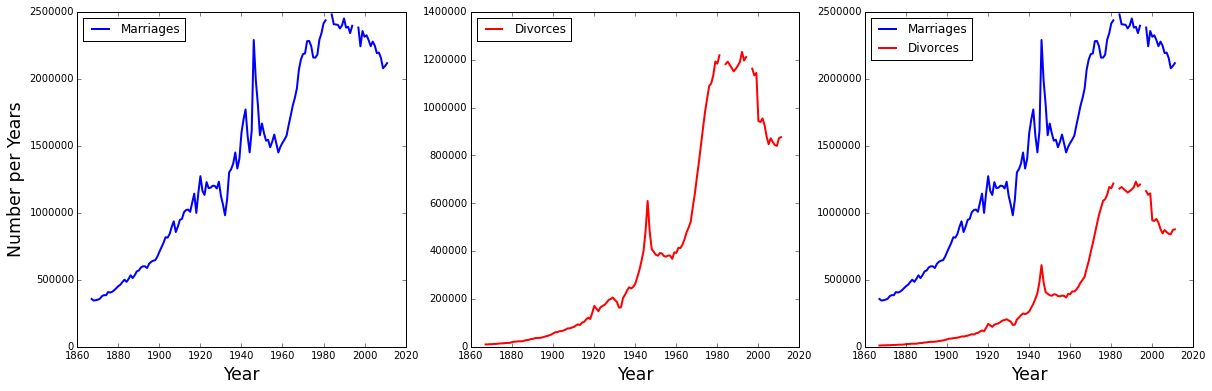

In [11]:
# = Create the axis
fig = mpl.figure(figsize=[20,6]) # figsize = [width,heigth]
ax1 = fig.add_subplot(1,3,1) # subplot(number-of-row, number-of-columns, index-of-the-plot)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
# = Do the plots
ax1.plot(Year,Marriages,lw=2,color="b", label="Marriages")
ax2.plot(Year,Divorces, lw=2,color="r", label="Divorces")
ax3.plot(Year,Marriages,lw=2,color="b", label="Marriages")
ax3.plot(Year,Divorces, lw=2,color="r", label="Divorces")

# = Add the labels
# comprehension list again, the _ because I do not care to get the output of the functions
_ = [ax.set_xlabel("Year",fontsize="xx-large") for ax in [ax1,ax2,ax3]]
_ = ax1.set_ylabel("Number per Years",fontsize="xx-large")
_ = [ax.legend(loc="upper left") for ax in [ax1,ax2,ax3]]

**Remark** It was not requested to do such a fancy plot for the exercice.

# 3. When was the maximum of marriages per 1000-persons (see the argmax option of numpy)? of Divorces?

numpy has a tool to get the index of the maximum value entry: np.argmax (see also np.arwhere/np.armin etc.)

CAREFUL WITH THE NAN VALUES !

#### Year of the maximum amount of Marriages_per_1000

In [12]:
flagnan = Marriages_per_1000!=Marriages_per_1000
maxindex = np.argmax(Marriages_per_1000[~flagnan])
print(Year[~flagnan][maxindex])

1946.0


In [13]:
# or faster
print(Year[~flagnan] [np.argmax(Marriages_per_1000[~flagnan])])

1946.0


In [14]:
#### Year of the maximum amount of Divorce_per_1000

In [15]:
flagnan = Divorces_per_1000!=Divorces_per_1000
print(Year[~flagnan][np.argmax(Divorces_per_1000[~flagnan] )]) 
# Remark that in case of equality in max, first index is returned, here 1979 and 1982 would have worked

1979.0


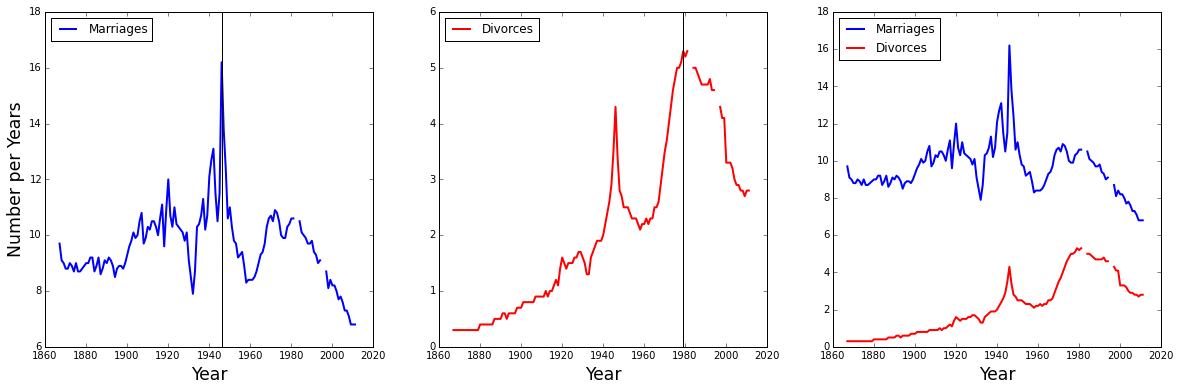

In [16]:
# = Create the axis
fig = mpl.figure(figsize=[20,6]) # figsize = [width,heigth]
ax1 = fig.add_subplot(1,3,1) # subplot(number-of-row, number-of-columns, index-of-the-plot)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
# = Do the plots
ax1.plot(Year,Marriages_per_1000,lw=2,color="b", label="Marriages")
ax2.plot(Year,Divorces_per_1000, lw=2,color="r", label="Divorces")
ax3.plot(Year,Marriages_per_1000,lw=2,color="b", label="Marriages")
ax3.plot(Year,Divorces_per_1000, lw=2,color="r", label="Divorces")

# = Add the labels
# comprehension list again, the _ because I do not care to get the output of the functions
_ = [ax.set_xlabel("Year",fontsize="xx-large") for ax in [ax1,ax2,ax3]]
_ = ax1.set_ylabel("Number per Years",fontsize="xx-large")
_ = [ax.legend(loc="upper left") for ax in [ax1,ax2,ax3]]

# Let's see the lines
ax1.axvline(1946.0,color="k")
ax2.axvline(1979.0,color="k")

# 4 and 6: Show the histogram of Marriages per 1000-persons. What is the median, mean, std and nmad of the distribution.

('mean', 9.6354609929078006)
('median', 9.5999999999999996)
('std', 1.3144658733365389)
('nmad', 1.1863999999999986)


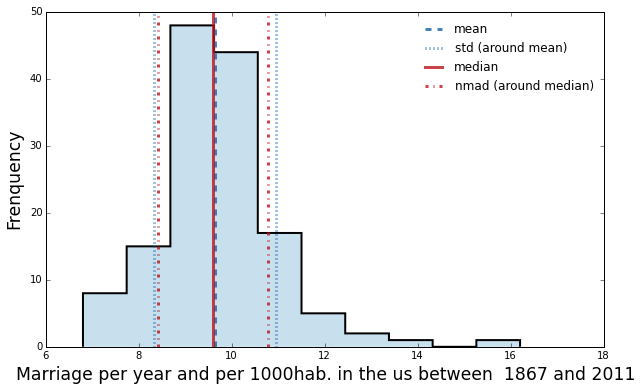

In [17]:
fig = mpl.figure(figsize=[10,6])
mpl.hist(Marriages_per_1000[Marriages_per_1000==Marriages_per_1000], lw=2,
         histtype="step",fill=True,
         fc=mpl.cm.Blues(0.6,0.3),ec="k",bins=10)

# === Some Stat
mean = np.mean(Marriages_per_1000[Marriages_per_1000==Marriages_per_1000])
median = np.median(Marriages_per_1000[Marriages_per_1000==Marriages_per_1000])
std  = np.std(Marriages_per_1000[Marriages_per_1000==Marriages_per_1000])
nmad = np.median([np.abs(m-median) for m in Marriages_per_1000[Marriages_per_1000==Marriages_per_1000]]) *1.483

print("mean",mean)
print("median",median)
print("std",std)
print("nmad",nmad)

# === Ploting the Values
mpl.axvline(mean,
           label="mean", ls="--", lw=3, color=mpl.cm.Blues(0.8,0.8))

# = Mean and STD
mpl.axvline(mean-std,
           label="std (around mean)", ls=":", lw=3, color=mpl.cm.Blues(0.8,0.8))
mpl.axvline(mean+std,
           label="_no_legend_", ls=":", lw=3, color=mpl.cm.Blues(0.8,0.8))

# = Median and nMAD
mpl.axvline(median,
           label="median", ls="-", lw=3, color=mpl.cm.Reds(0.8,0.8))
mpl.axvline(median-nmad,
           label="nmad (around median)", ls="-.", lw=3, color=mpl.cm.Reds(0.8,0.8))

mpl.axvline(median+nmad,
           label="_no_legend_", ls="-.", lw=3, color=mpl.cm.Reds(0.8,0.8))

mpl.legend(loc="upper right", frameon=False)
mpl.xlabel("Marriage per year and per 1000hab. in the us between  1867 and 2011", fontsize="xx-large")
mpl.ylabel("Frenquency", fontsize="xx-large")

# 5 What was the average us-population during the 30s, and during the 2000s ?

For that, use the array masking we've seen in class

In [18]:
print(Population[(Year>=1930) &(Year<1940)].mean())

126996200.0


In [19]:
print(Population[(Year>=2000) &(Year<2010)].mean())

294775600.0


# End of the exercise
***